In [67]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [69]:
# Adjust the path
file_path = '/Users/eleni_icon/HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)


# Outlier detection and cleaning

In [70]:
# Check for missing values
missing_values = df.isnull().sum()


In [71]:
# Basic statistics to identify potential outliers
summary_statistics = df.describe()

In [72]:
# Display the results
missing_values, summary_statistics

(Age                           0
 Attrition                     0
 Business Travel               0
 Daily Rate                    0
 Department                    0
 Distance From Home            0
 Education                     0
 Education Field               0
 Employee Count                0
 Employee Number               0
 Environment Satisfaction      0
 Gender                        0
 Hourly Rate                   0
 Job Involvement               0
 Job Level                     0
 Job Role                      0
 Job Satisfaction              0
 Marital Status                0
 Monthly Income                0
 Monthly Rate                  0
 Num Companies Worked          0
 Over18                        0
 OverTime                      0
 Percent Salary Hike           0
 Performance Rating            0
 Relationship Satisfaction     0
 Standard Hours                0
 Stock Option Level            0
 Total Working Years           0
 Training Times Last Year      0
 Work Life

In [73]:
# Define a function to plot boxplots for variables of interest
def plot_boxplot(column_name, title):
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[column_name])
    plt.title(title)
    plt.ylabel(column_name)
    plt.show()

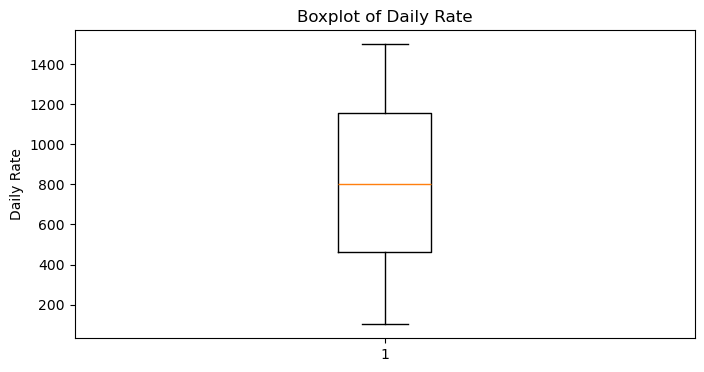

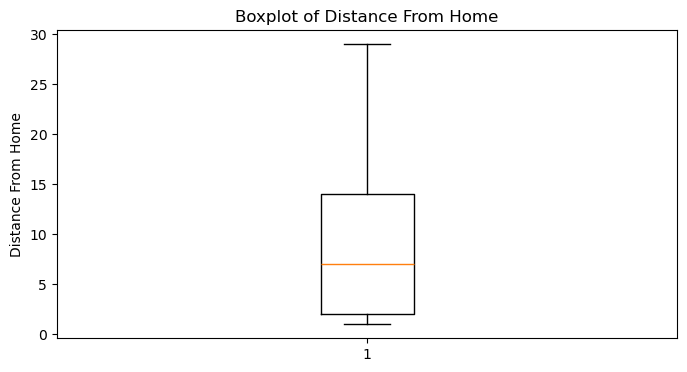

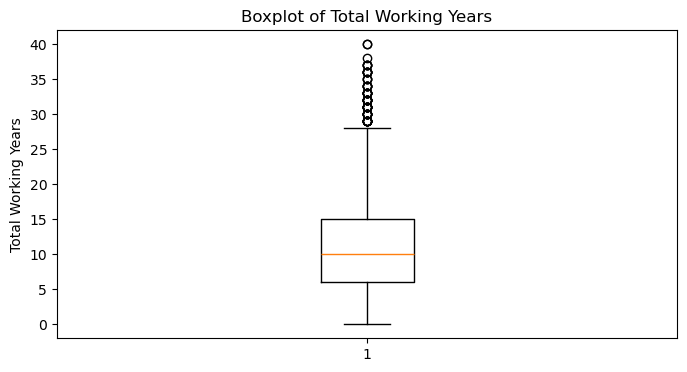

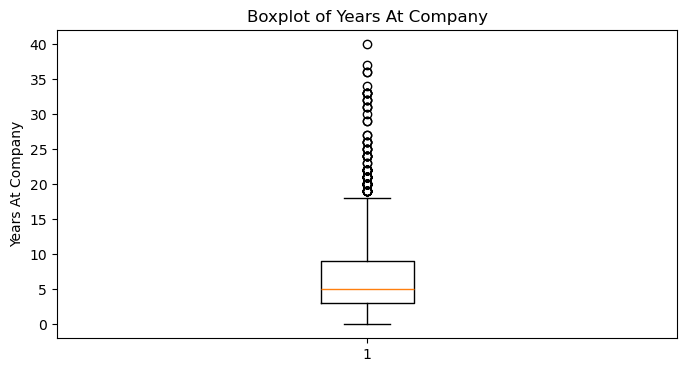

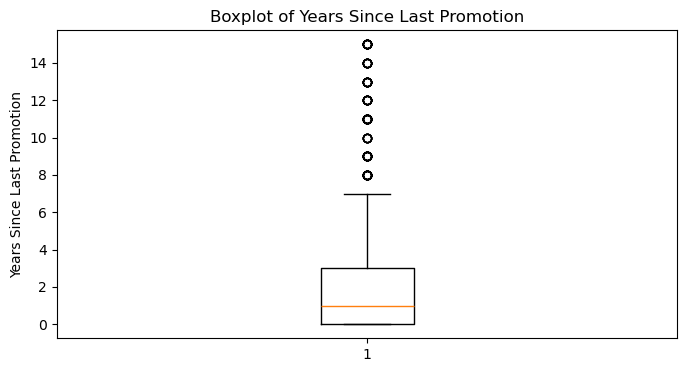

In [75]:
# Plotting boxplots for the identified columns with potential outliers
plot_boxplot('Daily Rate', 'Boxplot of Daily Rate')
plot_boxplot('Distance From Home', 'Boxplot of Distance From Home')
plot_boxplot('Total Working Years', 'Boxplot of Total Working Years')
plot_boxplot('Years At Company', 'Boxplot of Years At Company')
plot_boxplot('Years Since Last Promotion', 'Boxplot of Years Since Last Promotion')

In [76]:

# Calculating IQR and detecting outliers for the same variables
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [77]:
# Detecting outliers
outliers_daily_rate = detect_outliers('Daily Rate')
outliers_distance_from_home = detect_outliers('Distance From Home')
outliers_total_working_years = detect_outliers('Total Working Years')
outliers_years_at_company = detect_outliers('Years At Company')
outliers_years_since_promotion = detect_outliers('Years Since Last Promotion')


In [78]:
# Show the number of outliers detected
{
    "Outliers in Daily Rate": len(outliers_daily_rate),
    "Outliers in Distance From Home": len(outliers_distance_from_home),
    "Outliers in Total Working Years": len(outliers_total_working_years),
    "Outliers in Years At Company": len(outliers_years_at_company),
    "Outliers in Years Since Last Promotion": len(outliers_years_since_promotion),
}

{'Outliers in Daily Rate': 0,
 'Outliers in Distance From Home': 0,
 'Outliers in Total Working Years': 63,
 'Outliers in Years At Company': 104,
 'Outliers in Years Since Last Promotion': 107}

In [79]:
# Filter out the outliers using the IQR method for the relevant columns
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [80]:
# Removing outliers from the relevant columns
cleaned_data = df.copy()
columns_to_clean = ['Total Working Years', 'Years At Company', 'Years Since Last Promotion']

In [81]:
for column in columns_to_clean:
    cleaned_data = remove_outliers(column)

In [82]:
# Verify the cleaning by checking basic statistics again for the cleaned columns
cleaned_summary_statistics = cleaned_data[['Total Working Years', 'Years At Company', 'Years Since Last Promotion']].describe()
cleaned_summary_statistics


,Total Working Years,Years At Company,Years Since Last Promotion
count,1363.000000,1363.000000,1363.000000
mean,10.568599,6.138665,1.484960
std,7.323164,5.134519,1.997142
min,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.000000
50%,9.000000,5.000000,1.000000
75%,14.000000,8.500000,2.000000
max,38.000000,37.000000,7.000000


In [83]:
cleaned_data.to_csv('cleaned_hr_dataset.csv', index=False)

# Exploratory data analysis (EDA) with visualizations

In [92]:
# We will analyze attrition in relation to key factors like Age, MonthlyIncome, TotalWorkingYears, and YearsAtCompany.
# First, convert 'Attrition' into a binary variable for better visualization
cleaned_data.loc[:, 'Attrition Binary'] = cleaned_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


/var/folders/fs/0m_d2lxj6mdbrcp0xzk4cnjh0000gn/T/ipykernel_80471/63992510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.loc[:, 'Attrition Binary'] = cleaned_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


In [85]:
# Plotting key factors influencing attrition
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Age vs Attrition')

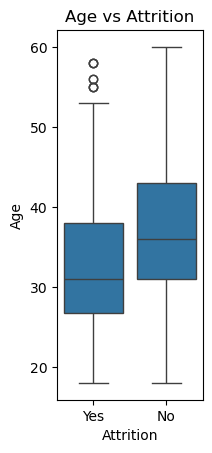

In [86]:
# Age vs Attrition
plt.subplot(1, 3, 1)
sns.boxplot(x='Attrition', y='Age', data=cleaned_data)
plt.title('Age vs Attrition')

Text(0.5, 1.0, 'Monthly Income vs Attrition')

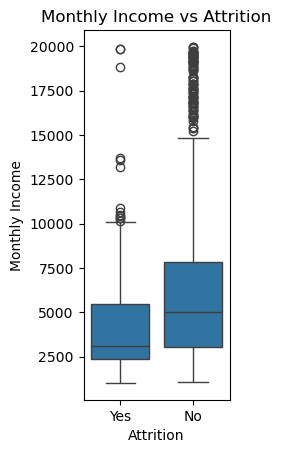

In [91]:
# MonthlyIncome vs Attrition
plt.subplot(1, 3, 2)
sns.boxplot(x='Attrition', y='Monthly Income', data=cleaned_data)
plt.title('Monthly Income vs Attrition')

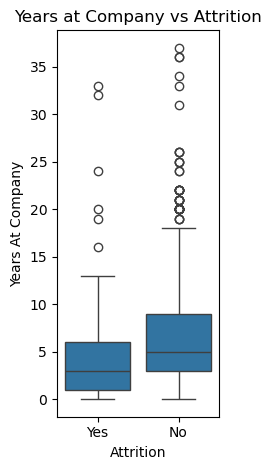

In [89]:
# YearsAtCompany vs Attrition
plt.subplot(1, 3, 3)
sns.boxplot(x='Attrition', y='Years At Company', data=cleaned_data)
plt.title('Years at Company vs Attrition')

plt.tight_layout()
plt.show()

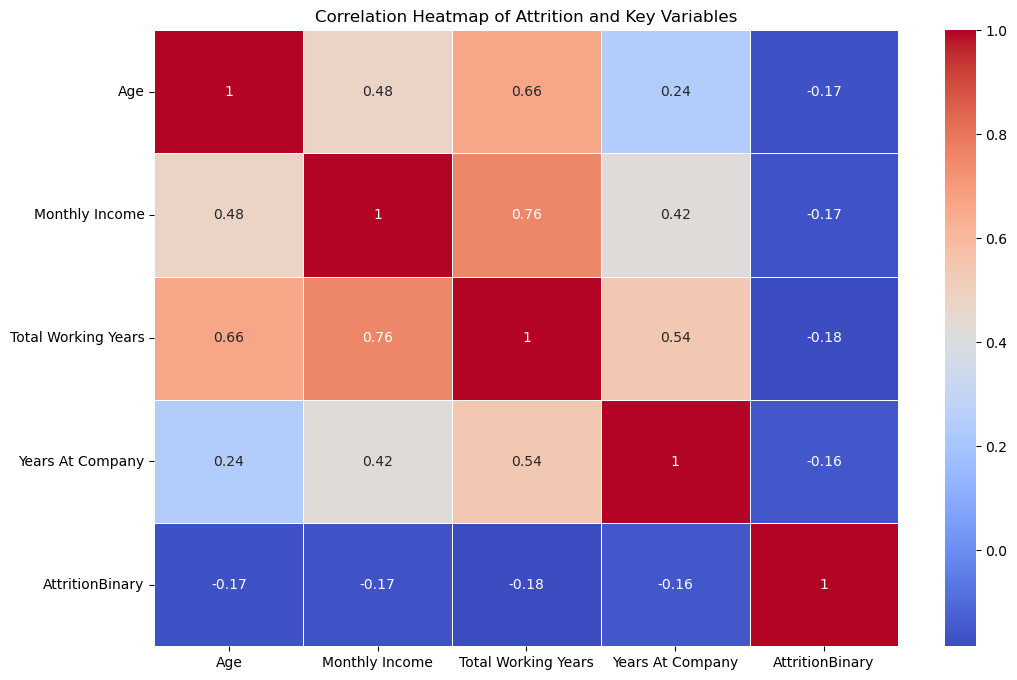

In [90]:
# Correlation heatmap to further explore relationships between attrition and numerical variables
plt.figure(figsize=(12, 8))
correlation_matrix = cleaned_data[['Age', 'Monthly Income', 'Total Working Years', 'Years At Company', 'AttritionBinary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Attrition and Key Variables')
plt.show()

Age vs Attrition:

Employees who have left the company (Attrition = Yes) tend to be younger, with a median age below 35.
Employees who stay (Attrition = No) have a slightly higher median age, closer to 40.
This suggests that younger employees are more likely to leave, which could point to early-career employees seeking opportunities or dissatisfaction.

Monthly Income vs Attrition:

Employees who have left the company tend to have lower monthly incomes.
The median income for employees with attrition is considerably lower than for those who stay.
This indicates that low-income employees may be more likely to leave, possibly due to financial dissatisfaction or better offers elsewhere.

Years at Company vs Attrition:

Employees with a shorter tenure (fewer years at the company) are more likely to leave.
Those who have stayed longer tend to remain with the company, implying early attrition is a common pattern. Employees who survive the first few years are likely to stay longer.
From the heatmap:

Negative Correlations with Attrition:
Age (-0.17): Younger employees are more likely to leave.

Monthly Income (-0.17): Lower-paid employees are more likely to leave.

Years at Company and Total Working Years also show negative correlations with attrition, which indicates that longer-tenured and more experienced employees are less likely to leave.

These findings suggest potential focus areas for employee retention strategies, such as improving support for younger or lower-paid employees or offering early-career development opportunities to reduce early attrition.

/var/folders/fs/0m_d2lxj6mdbrcp0xzk4cnjh0000gn/T/ipykernel_80471/3105743293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Year Of Hire'] = 2024 - cleaned_data['Years At Company']


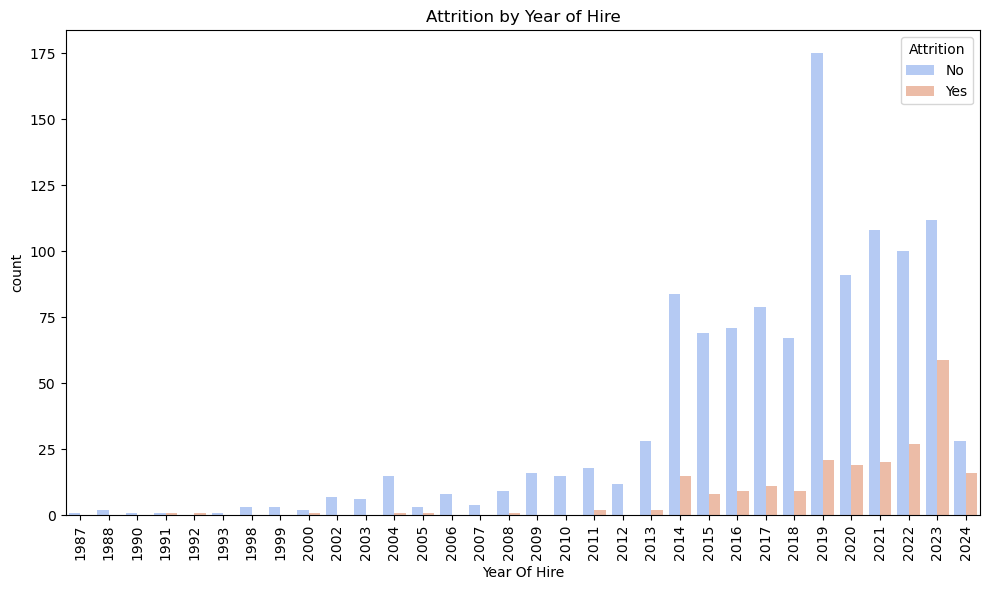

In [94]:
# Assuming we have a "YearsAtCompany" and "TotalWorkingYears", we can derive their year of hire.

# Create a new column to estimate the year of hire
cleaned_data['Year Of Hire'] = 2024 - cleaned_data['Years At Company']

# Now let's visualize attrition by year of hire
plt.figure(figsize=(10, 6))
sns.countplot(x='Year Of Hire', hue='Attrition', data=cleaned_data, palette="coolwarm")
plt.title('Attrition by Year of Hire')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

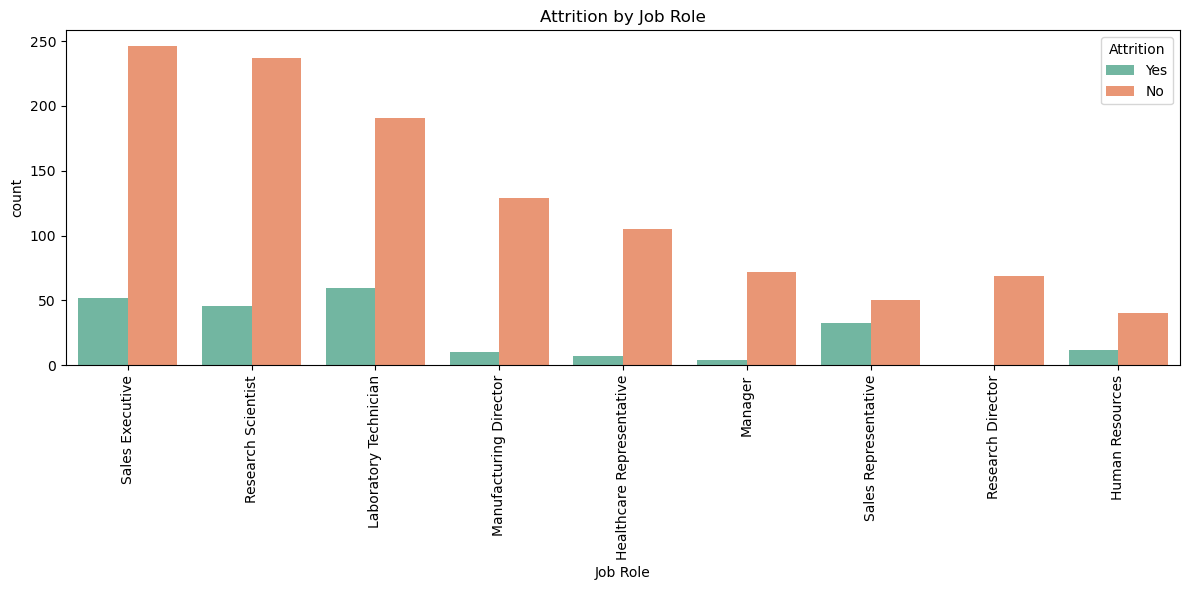

In [95]:
# Next, let's break down attrition by Job Role
plt.figure(figsize=(12, 6))
sns.countplot(x='Job Role', hue='Attrition', data=cleaned_data, palette="Set2")
plt.title('Attrition by Job Role')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Attrition by Year of Hire:

Recent Hires (2018 onwards): The majority of the attrition is happening among employees who were hired more recently, particularly after 2018.
High Attrition for 2023 Hires: There is a noticeable spike in attrition for employees hired in 2023, indicating a potential issue with recent hires.
Tenure Effect: Employees hired many years ago (e.g., before 2015) tend to have very low attrition, reinforcing the idea that early tenure is a critical period for turnover.
Attrition by Job Role:

Sales Executives and Laboratory Technicians: These roles show a higher level of attrition compared to others. The "Sales Executive" role, in particular, stands out with a higher number of employees leaving.
Research Scientist and Manufacturing Director roles show lower attrition rates, suggesting higher retention in these positions.

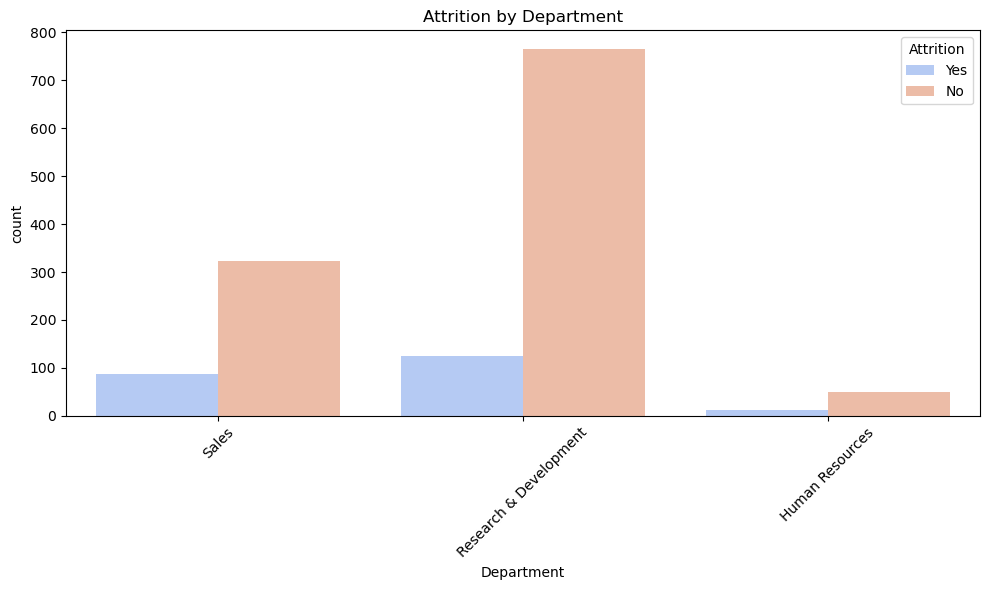

In [96]:
# 1. Attrition by Department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=cleaned_data, palette="coolwarm")
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

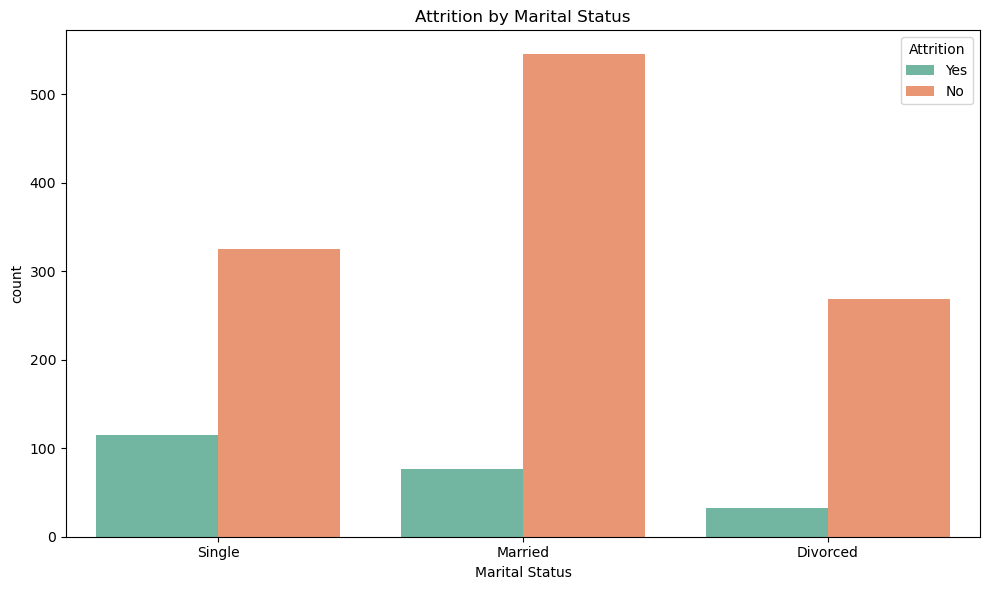

In [97]:
# 2. Attrition by Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital Status', hue='Attrition', data=cleaned_data, palette="Set2")
plt.title('Attrition by Marital Status')
plt.tight_layout()
plt.show()

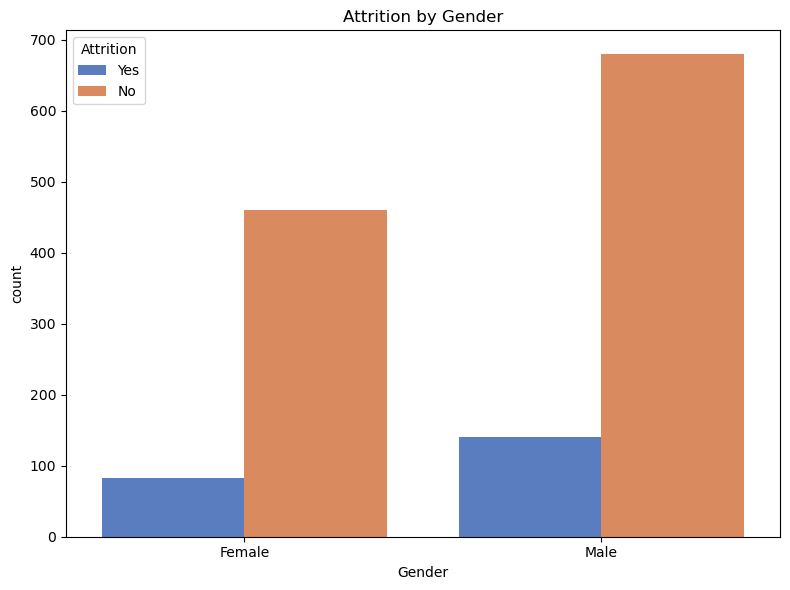

In [98]:
# 3. Attrition by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Attrition', data=cleaned_data, palette="muted")
plt.title('Attrition by Gender')
plt.tight_layout()
plt.show()

In [99]:
# 4. Attrition by Education Level
education_mapping = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor’s Degree',
    4: 'Master’s Degree',
    5: 'Doctorate'
}


In [100]:

# Apply the mapping to create new columns
cleaned_data.loc[:, 'EducationDesc'] = cleaned_data['Education'].map(education_mapping)

/var/folders/fs/0m_d2lxj6mdbrcp0xzk4cnjh0000gn/T/ipykernel_80471/2199231485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.loc[:, 'EducationDesc'] = cleaned_data['Education'].map(education_mapping)


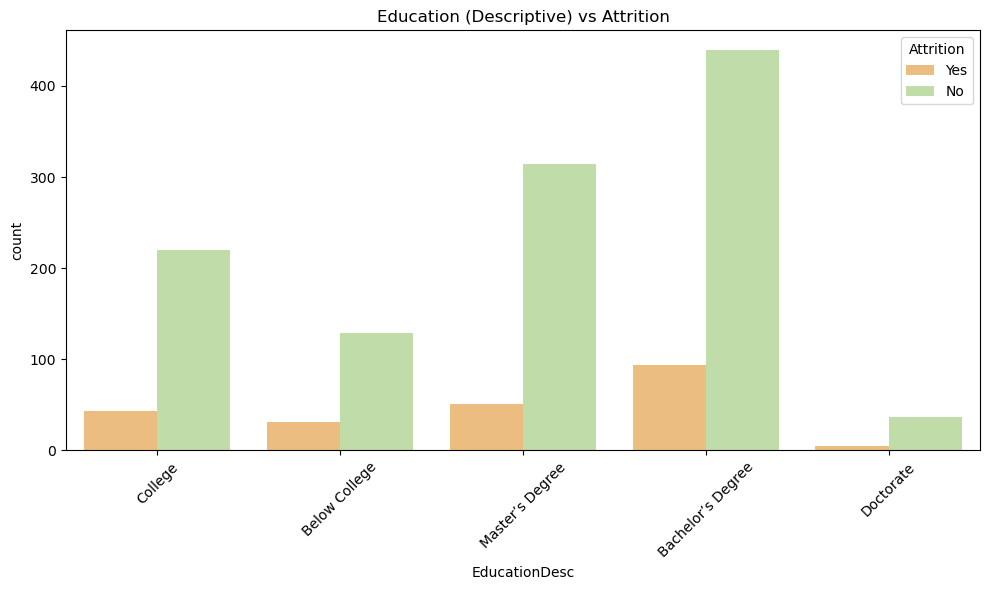

In [101]:
# Education vs Attrition (descriptive labels)
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationDesc', hue='Attrition', data=cleaned_data, palette="Spectral")
plt.title('Education (Descriptive) vs Attrition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [102]:
# Map the numeric values to their corresponding descriptions
work_life_balance_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'Good',
    4: 'Excellent'
}

In [105]:
# Apply the mapping to create new columns
cleaned_data.loc[:,'Work Life Balance Desc'] = cleaned_data['Work Life Balance'].map(work_life_balance_mapping)

/var/folders/fs/0m_d2lxj6mdbrcp0xzk4cnjh0000gn/T/ipykernel_80471/3617470797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.loc[:,'Work Life Balance Desc'] = cleaned_data['Work Life Balance'].map(work_life_balance_mapping)


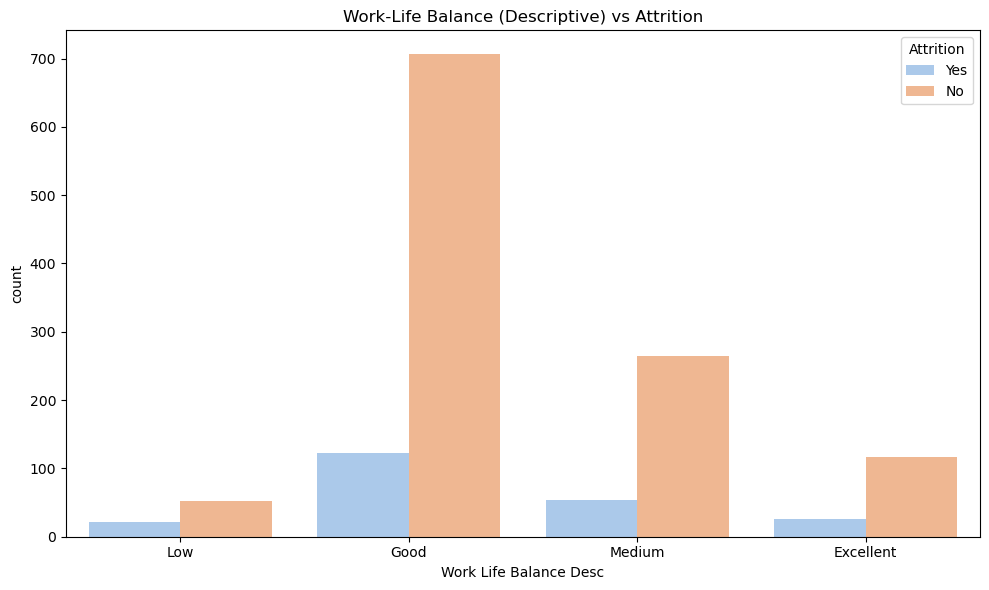

In [107]:
#5. Work-Life Balance vs Attrition (descriptive labels)
plt.figure(figsize=(10, 6))
sns.countplot(x='Work Life Balance Desc', hue='Attrition', data=cleaned_data, palette="pastel")
plt.title('Work-Life Balance (Descriptive) vs Attrition')
plt.tight_layout()
plt.show()

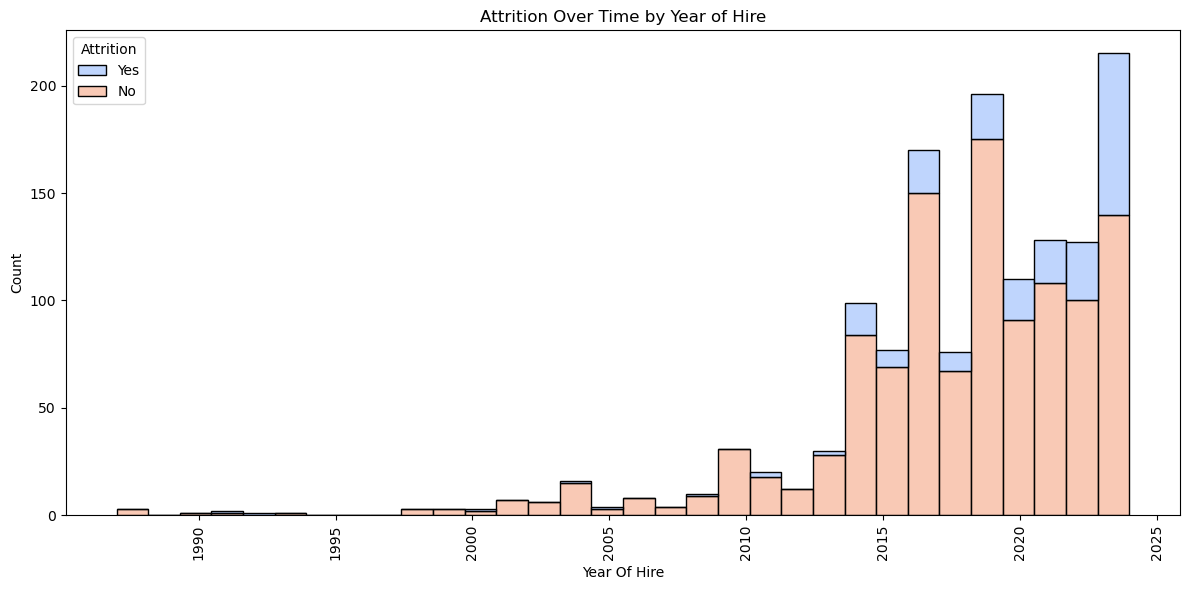

In [109]:
# 6. Attrition Over Time (Hire Date)
plt.figure(figsize=(12, 6))
sns.histplot(data=cleaned_data, x='Year Of Hire', hue='Attrition', multiple='stack', palette="coolwarm", kde=False)
plt.title('Attrition Over Time by Year of Hire')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Attrition impact analysis (cost per employee, total cost)

In [113]:
# Step 1: Identify the number of employees who actually left (Attrition = 'Yes')
actual_attrition_employees = cleaned_data[cleaned_data['Attrition'] == 'Yes']

In [115]:
# Step 2: Estimate cost per employee (same cost structure as earlier)
avg_monthly_income_actual = actual_attrition_employees['Monthly Income'].mean()
hiring_cost_actual = 0.20 * avg_monthly_income_actual
onboarding_cost_actual = 0.15 * avg_monthly_income_actual
productivity_loss_actual = 0.50 * avg_monthly_income_actual * 6  # 6 months productivity loss
cost_per_employee_actual = hiring_cost_actual + onboarding_cost_actual + productivity_loss_actual

Cost Components Explanation:

Hiring Cost (20%): This is an industry estimate that suggests the cost of hiring a new employee is approximately 20% of their annual salary. This cost includes expenses like job ads, recruiter time, interviews, etc.

Onboarding & Training Cost (15%): Onboarding costs are typically estimated at 10-15% of an employee's annual salary. This includes training, resources, and the time managers spend training new hires.

Productivity Loss (50% for 6 months): New employees are often not fully productive for their first six months. We assume a 50% productivity loss for 6 months, which equates to roughly half of their salary over this period.


In [116]:
# Step 3: Total attrition cost based on actual attrition data
num_actual_attrition_employees = actual_attrition_employees.shape[0]
total_actual_attrition_cost = num_actual_attrition_employees * cost_per_employee_actual

In [117]:

# Display the results for Project 1
avg_monthly_income_actual, cost_per_employee_actual, num_actual_attrition_employees, total_actual_attrition_cost


(4467.357142857143, 14965.64642857143, 224, 3352304.8000000003)

In [119]:
# Step 1: Breakdown of cost components
cost_labels = ['Hiring Cost', 'Onboarding Cost', 'Productivity Loss (6 months)']
cost_values = [hiring_cost_actual, onboarding_cost_actual, productivity_loss_actual]


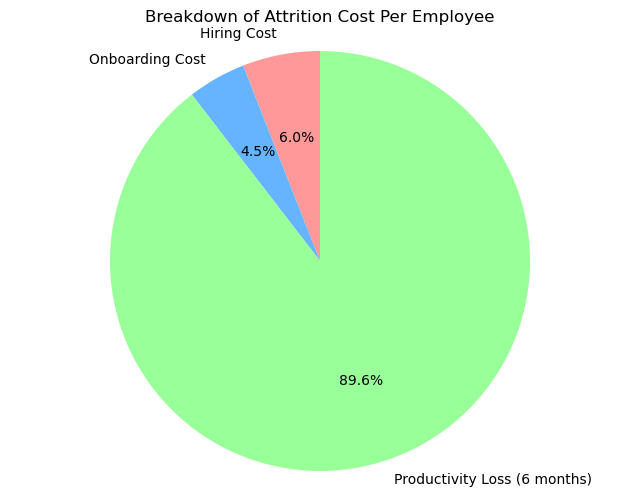

In [120]:
# Create a pie chart to show the cost breakdown
plt.figure(figsize=(8, 6))
plt.pie(cost_values, labels=cost_labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Breakdown of Attrition Cost Per Employee')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


# Retention strategy mapping tied to key findings

In [121]:
# Let's add potential savings scenarios to the bar chart
# We will compare the current total attrition cost with potential savings at 10%, 20%, and 30% reductions

# Define scenarios and potential savings
scenarios = ['Current Cost', '10% Reduction', '20% Reduction', '30% Reduction']
total_costs = [total_actual_attrition_cost, 
               total_actual_attrition_cost * 0.90, 
               total_actual_attrition_cost * 0.80, 
               total_actual_attrition_cost * 0.70]

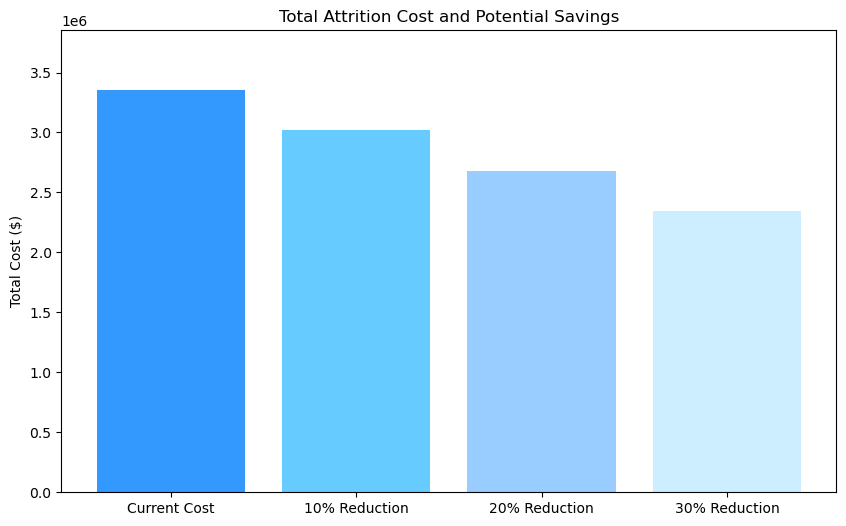

In [122]:
# Create a new bar chart with cost reduction scenarios
plt.figure(figsize=(10, 6))
plt.bar(scenarios, total_costs, color=['#3399ff', '#66ccff', '#99ccff', '#cceeff'])
plt.title('Total Attrition Cost and Potential Savings')
plt.ylabel('Total Cost ($)')
plt.ylim(0, max(total_costs) + 500000)  # Set y-axis limit to display savings clearly
plt.show()

In [124]:
# Visual Aid: Mapping Key Findings to Retention Strategies

# Define findings and corresponding strategies
findings = ['High Attrition in Sales Executives & Lab Technicians', 'Low Work-Life Balance', 'Higher Attrition in Recent Hires', 
            'Single Employees More Likely to Leave', 'Higher Attrition in Lower Education Levels']
strategies = ['Career Development Programs', 'Work-Life Balance Programs', 'Onboarding & Mentoring', 
              'Support Programs for Single Employees', 'Education & Training Programs']


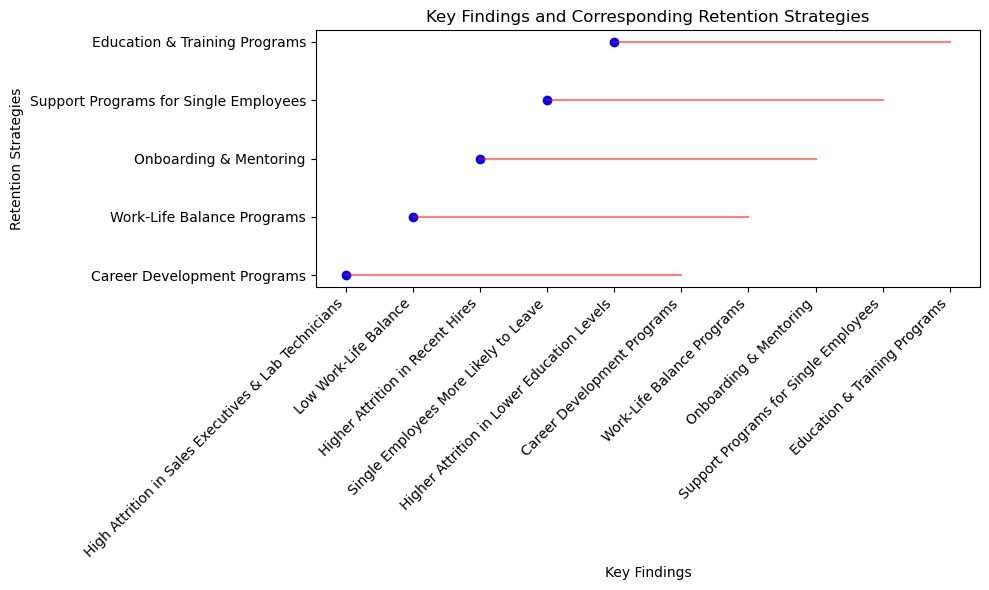

In [125]:
# Create a figure to map findings to strategies
plt.figure(figsize=(10, 6))
plt.scatter(findings, strategies, color='blue')
plt.title('Key Findings and Corresponding Retention Strategies')
plt.xlabel('Key Findings')
plt.ylabel('Retention Strategies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Draw connecting lines between findings and strategies
for i in range(len(findings)):
    plt.plot([findings[i], strategies[i]], [strategies[i], strategies[i]], 'r-', alpha=0.5)

plt.show()

1. Career Development Programs
Strategy: 
Introduce personalized career growth paths, skill-building workshops, and leadership opportunities for high-attrition roles like Sales Executives and Laboratory Technicians.
Expected Outcome: Increase job satisfaction and reduce turnover by showing employees clear career progression.
Timeline: Implement within 6 months.
Stakeholders: HR, Learning & Development, Department Heads.

2. Work-Life Balance Programs
Strategy: Offer flexible work hours, remote work options, and wellness initiatives targeting employees with low work-life balance ratings.
Expected Outcome: Improve retention in high-stress roles and enhance employee well-being.
Timeline: Start within 3 months with pilot programs.
Stakeholders: HR, Wellness Committee, Leadership.

3. Onboarding & Mentoring
Strategy: Revamp the onboarding process for new hires and create mentorship programs to provide early-career support.
Expected Outcome: Reduce early-stage attrition among new hires, especially those recruited after 2015.
Timeline: Implement within 4 months.
Stakeholders: HR, Department Heads, Learning & Development.


In [127]:
cleaned_data.to_csv('cleaned_hr_dataset.csv', index=False)
